## Import dataset 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

## Import dataset

In [2]:
dataset = pd.read_csv(r'C:\Users\Mahira\Desktop\daboot\python\Ders 10\blood.csv')

In [3]:
dataset.head()

,V1,V2,V3,V4,Class
0,2,50,12500,98,2
1,0,13,3250,28,2
2,1,16,4000,35,2
3,2,20,5000,45,2
4,1,24,6000,77,1


In [4]:
dataset.describe()
# V1 - Recency(months) number of month could be zero. So, I did not replace zeros with anything.

,V1,V2,V3,V4,Class
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,1.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,1.000000
25%,2.750000,2.000000,500.000000,16.000000,1.000000
50%,7.000000,4.000000,1000.000000,28.000000,1.000000
75%,14.000000,7.000000,1750.000000,50.000000,1.000000
max,74.000000,50.000000,12500.000000,98.000000,2.000000


In [5]:
dataset.isnull().sum()

V1       0
V2       0
V3       0
V4       0
Class    0
dtype: int64

In [6]:
dataset.dtypes

V1       int64
V2       int64
V3       int64
V4       int64
Class    int64
dtype: object

<AxesSubplot:>

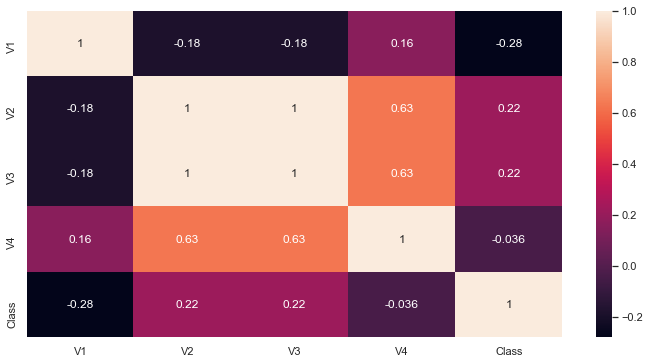

In [7]:
plt.figure(figsize = (12,6))
sns.heatmap(dataset.corr(), annot =True)
# All correlations are less than 0.3, but correlation between V2-V3 is 1. 
# During next steps, I will drop one of them (V2 or V3), but now I keep all.

In [8]:
dataset.columns

Index(['V1', 'V2', 'V3', 'V4', 'Class'], dtype='object')

## Outlier Treatment 

<AxesSubplot:xlabel='V1', ylabel='Density'>

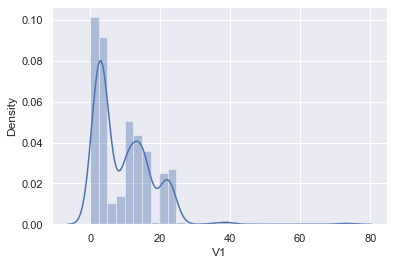

In [13]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(dataset['V1'])

<AxesSubplot:xlabel='V1'>

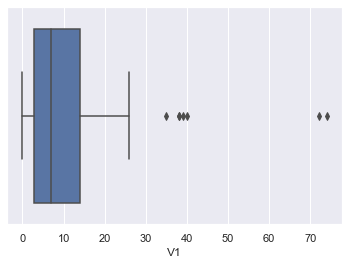

In [12]:
import warnings
warnings.filterwarnings('ignore')
sns.boxplot(dataset['V1'])

In [11]:
Q1=dataset['V1'].quantile(0.25)
Q3=dataset['V1'].quantile(0.75)
IQR=Q3-Q1
Lower = Q1-IQR
Upper = Q3+IQR
print(Lower, Upper)

-8.5 25.25


In [14]:
data1 = dataset[dataset['V1'] < Upper]
data1.shape

(740, 5)

<AxesSubplot:xlabel='V2', ylabel='Density'>

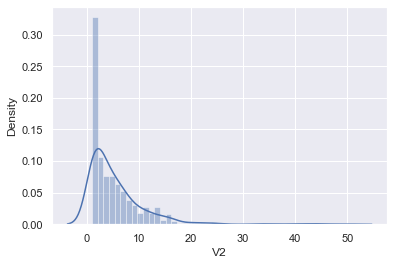

In [15]:
sns.distplot(data1['V2'])

<AxesSubplot:xlabel='V2'>

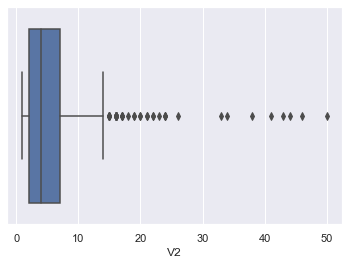

In [16]:
sns.boxplot(data1['V2'])

In [18]:
Q1=data1['V2'].quantile(0.25)
Q3=data1['V2'].quantile(0.75)
IQR=Q3-Q1
Lower = Q1-IQR
Upper = Q3+IQR
print(Lower, Upper)

-3.0 12.0


In [20]:
data2 = data1[data1['V2'] < Upper]
data2.shape

(659, 5)

<AxesSubplot:xlabel='V2'>

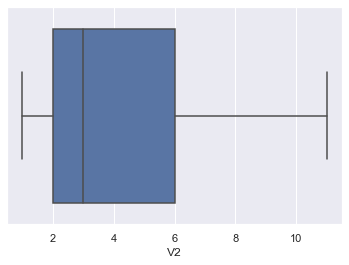

In [22]:
sns.boxplot(data2['V2'])

<AxesSubplot:xlabel='V4'>

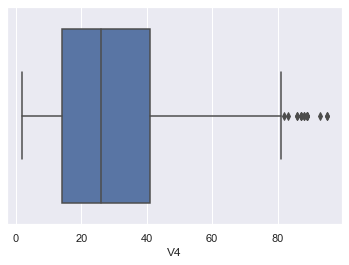

In [24]:
sns.boxplot(data2['V4'])

In [25]:
Q1=data2['V4'].quantile(0.25)
Q3=data2['V4'].quantile(0.75)
IQR=Q3-Q1
Lower = Q1-IQR
Upper = Q3+IQR
print(Lower, Upper)

-13.0 68.0


In [26]:
data3 = data2[data2['V4'] < Upper]
data3.shape

(609, 5)

<AxesSubplot:xlabel='V4', ylabel='Density'>

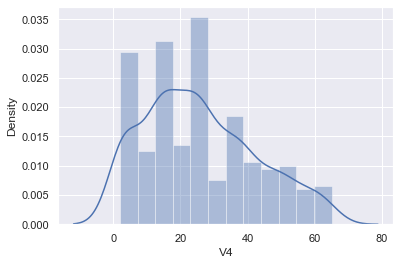

In [28]:
sns.distplot(data3['V4'])

In [29]:
dataset_cleaned = data3.copy()
dataset_cleaned.describe()

,V1,V2,V3,V4,Class
count,609.000000,609.000000,609.000000,609.000000,609.000000
mean,9.218391,3.829228,957.307061,25.844007,1.229885
std,6.986589,2.744684,686.170945,16.575792,0.421105
min,0.000000,1.000000,250.000000,2.000000,1.000000
25%,3.000000,2.000000,500.000000,14.000000,1.000000
50%,8.000000,3.000000,750.000000,23.000000,1.000000
75%,14.000000,6.000000,1500.000000,38.000000,1.000000
max,25.000000,11.000000,2750.000000,65.000000,2.000000


<AxesSubplot:xlabel='Class', ylabel='count'>

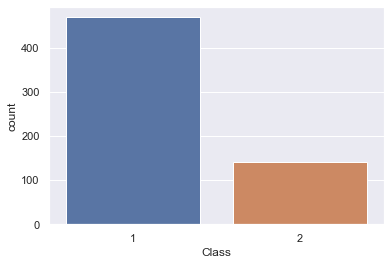

In [35]:
sns.countplot(dataset_cleaned['Class'])

## Multicollinearity

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# most correlated numerical cols with Class
variables = dataset_cleaned[['V1', 'V2', 'V3', 'V4']]
vif = pd.DataFrame()
vif["Features"] = variables.columns
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif.sort_values(by=['VIF'])

,Features,VIF
0,V1,2.390042
3,V4,6.825960
1,V2,inf
2,V3,inf


In [31]:
variables = dataset_cleaned[['V1', 'V3', 'V4']]
vif = pd.DataFrame()
vif["Features"] = variables.columns
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif.sort_values(by=['VIF'])

,Features,VIF
0,V1,2.390042
1,V3,4.538933
2,V4,6.825960


In [32]:
data_no_multicol = dataset_cleaned.drop(['V2'],axis=1)
data_no_multicol.columns

Index(['V1', 'V3', 'V4', 'Class'], dtype='object')

## Declare target and inputs

In [33]:
# The target(s) (dependent variable) is Class
target = data_no_multicol['Class']

# The inputs are the rest.
inputs = data_no_multicol[['V1', 'V3', 'V4']]

## Train and Test splitting

In [34]:
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size = 0.2, random_state = 42)

## Random Forest Classification

In [46]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [47]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [48]:
# predictions
y_pred = rfc.predict(x_test)

In [49]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
conmat_df = pd.DataFrame(cm)
conmat_df.columns = ['Predicted 0','Predicted 1']
conmat_df = conmat_df.rename(index={0: 'Real Value 0',1:'Real Value 1'})
conmat_df

,Predicted 0,Predicted 1
Real Value 0,81,9
Real Value 1,25,7


In [72]:
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy (Default):', round(accuracy*100, 2), '%')

Accuracy (Default): 72.13 %


## Randomized Search

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# number of features at every split
max_features = ['auto', 'sqrt']

# max depth
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }
# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the model
rfc_random.fit(x_train, y_train)
# print results
print(rfc_random.best_params_)

In [57]:
rscv = RandomForestClassifier(n_estimators=1200, max_depth= 220, max_features='auto')
rscv.fit(x_train,y_train)

RandomForestClassifier(max_depth=220, n_estimators=1200)

In [59]:
y_pred1 = rscv.predict(x_test)

In [69]:
accuracy1 = accuracy_score(y_test,y_pred1)
print('Accuracy (RandomizedCV):', round(accuracy1*100, 2), '%')

Accuracy (RandomizedCV): 75.41 %


In [61]:
cm1 = confusion_matrix(y_test, y_pred1)
conmat_df1 = pd.DataFrame(cm1)
conmat_df1.columns = ['Predicted 0','Predicted 1']
conmat_df1 = conmat_df1.rename(index={0: 'Real Value 0',1:'Real Value 1'})
conmat_df1

,Predicted 0,Predicted 1
Real Value 0,84,6
Real Value 1,24,8


In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           1       0.78      0.93      0.85        90
           2       0.57      0.25      0.35        32

    accuracy                           0.75       122
   macro avg       0.67      0.59      0.60       122
weighted avg       0.72      0.75      0.72       122



## Grid Search

In [64]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110, 200, 220, 260, 300],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [65]:
# Fit the grid search to the data
grid_search.fit(x_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 576 candidates, totalling 1728 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 1728 out of 1728 | elapsed: 13.1min finished


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 8,
 'n_estimators': 200}

In [66]:
grid = RandomForestClassifier(n_estimators=200, max_depth= 80, max_features=2, min_samples_leaf = 5, min_samples_split =8 )
grid.fit(x_train,y_train)

RandomForestClassifier(max_depth=80, max_features=2, min_samples_leaf=5,
                       min_samples_split=8, n_estimators=200)

In [67]:
y_pred2 = grid.predict(x_test)

In [68]:
accuracy2 = accuracy_score(y_test,y_pred2)
print('Accuracy (GridSearch):', round(accuracy2*100, 2), '%')

Accuracy (GridSearch): 77.05 %


In [70]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           1       0.79      0.93      0.86        90
           2       0.62      0.31      0.42        32

    accuracy                           0.77       122
   macro avg       0.71      0.62      0.64       122
weighted avg       0.75      0.77      0.74       122



## Acuracy results

In [73]:
print('Accuracy (Default):', round(accuracy*100, 2), '%')
print('Accuracy (RandomizedCV):', round(accuracy1*100, 2), '%')
print('Accuracy (GridSearch):', round(accuracy2*100, 2), '%')

Accuracy (Default): 72.13 %
Accuracy (RandomizedCV): 75.41 %
Accuracy (GridSearch): 77.05 %
